In [1]:
#Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import math

In [2]:
#Loading the final data after transformation

unemployment_data = pd.read_csv("unemployment_data.csv",index_col = [0])

In [3]:
#Making sure data looks like how it is supposed to be

unemployment_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35 entries, 0 to 34
Data columns (total 73 columns):
 #   Column                                                                                                             Non-Null Count  Dtype  
---  ------                                                                                                             --------------  -----  
 0   State                                                                                                              35 non-null     object 
 1   Non-Workers - PersonsGraduate and above other than Technical Degree                                                35 non-null     int64  
 2   Non-Workers - PersonsIlliterate                                                                                    35 non-null     int64  
 3   Non-Workers - PersonsLiterate                                                                                      35 non-null     int64  
 4   Non-Workers - PersonsLiterat

In [4]:
#Having a glance at the data

unemployment_data.head()

,State,Non-Workers - PersonsGraduate and above other than Technical Degree,Non-Workers - PersonsIlliterate,Non-Workers - PersonsLiterate,Non-Workers - PersonsLiterate but below Matric/Secondary,Non-Workers - PersonsMatric/Secondary but below Graduate,Non-Workers - PersonsTechnical Degree or Diploma equal to Degree or Post-Graduate Degree,Non-Workers - PersonsTechnical Diploma or Certificate not equal to Degree,Non-Workers - PersonsTotal,Non-Workers - MalesGraduate and above other than Technical Degree,...,Total Male,Female upto 14 years,Female 15-29 years,Female 30-44 years,Female 45-59 years,Female 60 years and above,Total Female,Grand Total,%ageofPersons (Total),No.ofPersons(lakhs) (Total)
0,Andaman & Nicobar Islands,6333,67178,160868,108094,40370,1150,1513,228046,1398,...,10,0,0,0,1,0,1,11,1.00,0.04
1,Andhra Pradesh,1684053,16961578,28196293,16291298,7813178,702312,282912,45157871,685788,...,535,0,59,30,14,4,107,642,9.20,78.78
2,Arunachal Pradesh,13537,355609,440461,322414,92214,1981,1231,796070,6230,...,7,1,2,0,0,0,3,10,34.67,4.91
3,Assam,333647,8166257,11069629,8281329,2002325,23865,13259,19235886,118601,...,48,0,6,5,0,0,11,59,31.98,101.27
4,Bihar,1071449,35779912,33594553,24928665,5853059,112005,17767,69374465,563409,...,49,0,5,2,0,0,7,56,33.74,358.15


Addressing the first analysis question :-

To begin with, the idea is to know for which Indian region, the unemployment numbers look the worst for.

In [5]:
sorted_df =unemployment_data.sort_values(["Non-Workers - PersonsTotal"], ascending=False)
sorted_df[["State","Non-Workers - PersonsTotal"]]

,State,Non-Workers - PersonsTotal
32,Uttar Pradesh,133997626
4,Bihar,69374465
19,Maharashtra,62946455
34,West Bengal,56519760
1,Andhra Pradesh,45157871
18,Madhya Pradesh,41052676
30,Tamil Nadu,39262349
28,Rajasthan,38662182
10,Gujarat,35671945
15,Karnataka,33222700


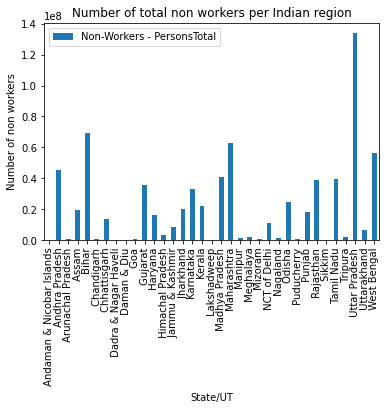

In [6]:
#Assessing the same visually

unemployment_data.plot(x = "State", y ="Non-Workers - PersonsTotal",kind ="bar")
plt.xlabel("State/UT")
plt.ylabel("Number of non workers")
plt.title("Number of total non workers per Indian region")
plt.show()

Having a cursory glance at the plot as well as the numbers above, it is pretty evident that Indian state named "Uttar Pradesh" has the highest number of unemployed people. The one clear highest peak in the plot represents the same and it tops the list in descending order as well.

The count for Uttar Pradesh is way beyond what the non working statistics are for the rest of the Indian regions. Quite evidently(from the numbers above), the unemployed people in this specific state are twice as much as the unemployed people for the second most unemployment impacted state i.e. Bihar.

It'd be helpful to look at the poverty situation of every Indian region and have it compared with the unemployment numbers. As the aim is to access the situation of worstly unemployment impacted state and derive a co-relation if any among the two.

In [7]:
# The "No.ofPersons(lakhs) (Total)" column represents the number of people falling below poverty line in every corresponding state.

unemployment_data[["State","Non-Workers - PersonsTotal","No.ofPersons(lakhs) (Total)"]]

,State,Non-Workers - PersonsTotal,No.ofPersons(lakhs) (Total)
0,Andaman & Nicobar Islands,228046,0.04
1,Andhra Pradesh,45157871,78.78
2,Arunachal Pradesh,796070,4.91
3,Assam,19235886,101.27
4,Bihar,69374465,358.15
5,Chandigarh,651314,2.35
6,Chhattisgarh,13364973,104.11
7,Dadra & Nagar Haveli,186548,1.43
8,Daman & Diu,121976,0.26
9,Goa,881297,16.96


In [8]:
#Converting the "No.ofPersons(lakhs) (Total)" column from lakhs thousands

unemployment_data["No.ofPersons(lakhs) (Total)"] = unemployment_data["No.ofPersons(lakhs) (Total)"] * 100000



In [9]:
#Checking if it worked fine

unemployment_data[["State","Non-Workers - PersonsTotal","No.ofPersons(lakhs) (Total)"]]

,State,Non-Workers - PersonsTotal,No.ofPersons(lakhs) (Total)
0,Andaman & Nicobar Islands,228046,4000.0
1,Andhra Pradesh,45157871,7878000.0
2,Arunachal Pradesh,796070,491000.0
3,Assam,19235886,10127000.0
4,Bihar,69374465,35815000.0
5,Chandigarh,651314,235000.0
6,Chhattisgarh,13364973,10411000.0
7,Dadra & Nagar Haveli,186548,143000.0
8,Daman & Diu,121976,26000.0
9,Goa,881297,1696000.0


Analysing unemployment and poverty numbers for every Indian region


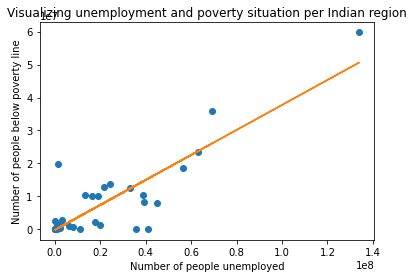

In [10]:
x = unemployment_data["Non-Workers - PersonsTotal"]
y = unemployment_data["No.ofPersons(lakhs) (Total)"]

#Creating a scatter plot between the two
plt.plot(x,y,'o')
plt.xlabel("Number of people unemployed")
plt.ylabel("Number of people below poverty line")
plt.title("Visualizing unemployment and poverty situation per Indian region")

#Adding a line of best fit to understand the relationship between the two
m, b = np.polyfit(x,y, 1)

plt.plot(x, m*x + b)

Poverty and unemployment in Indian regions do seem to share a positive linear relationship, but in order to make a conclusion, we must explore this co-relation more.

In [12]:
np.corrcoef(x, y)

array([[1.        , 0.86389091],
       [0.86389091, 1.        ]])

The above code chunk calculates the pearson co-relation coefficient for quanitfying the relationship between our two aspects of interest i.e. Number of unemployed people in a given region and the number of people falling below poverty line.

The co-relation coefficient is supposed to be a number between -1 and 1. More the number is towards 1, the more positive relationship it depicts.
These two have a co-relation as strong as 0.86, which is pretty strong.

So,it is safe to state that a region with more unemployment would have more people under below poverty line as well. At the same time, if unemployment numbers are not bad enough, the region's poverty situation would be in accordance to the same. 

However, a perfect linear positive relationship accounts for a corelation coefficient of 1, which is not the case  for unemployment and poverty. Hence, this indicates that there are other factors influencing the povery statistis for a region apart from unemployment.And we would not be able to make a comment on the same, as we don't have the data for it.

NOTE - This relationship in no sense is a causation as we can't make a conclusion if poverty is driven by unemployment. On the basis of the data records we have, we can only summarize how strongly these two aspects are co-related to each other.

Now that we know, these two social problems share a quite strong association, it's time we look at the poverty numbers for our worst unemployment hit state - Uttar Pradesh.

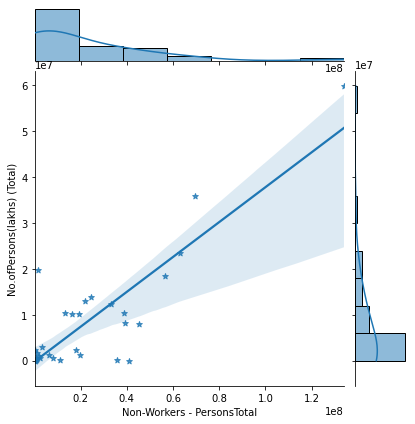

In [11]:
sns.jointplot(data = unemployment_data, x="Non-Workers - PersonsTotal", y="No.ofPersons(lakhs) (Total)", kind="reg", marker="*")

In [13]:
sorted_df =unemployment_data.sort_values(["No.ofPersons(lakhs) (Total)"], ascending=False)
sorted_df[["State","No.ofPersons(lakhs) (Total)"]]

,State,No.ofPersons(lakhs) (Total)
32,Uttar Pradesh,59819000.0
4,Bihar,35815000.0
19,Maharashtra,23406000.0
20,Manipur,19792000.0
34,West Bengal,18498000.0
25,Odisha,13853000.0
16,Kerala,12976000.0
15,Karnataka,12433000.0
6,Chhattisgarh,10411000.0
28,Rajasthan,10292000.0


Uttar Pradesh again tops the list as per the number of people falling before the poverty line. So, it can be concluded that being the worst unemployment hit Indian state, the poverty stats of the region are terribe as well for the same(as we would have expected). The statement has been made in reference to the co-relation deduced among the two above.

It'd help to visualize unemployment and poverty in the following manner.

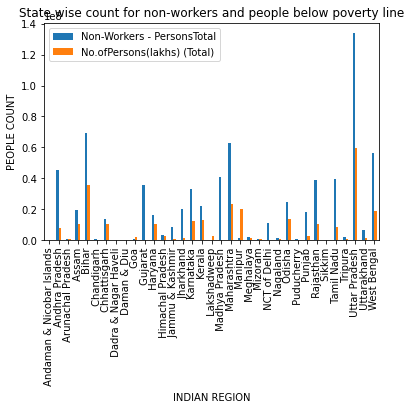

In [14]:
unemployment_data.plot(x="State", y=["Non-Workers - PersonsTotal", "No.ofPersons(lakhs) (Total)"], kind="bar")
plt.ylabel("PEOPLE COUNT")
plt.xlabel("INDIAN REGION")
plt.title("State wise count for non-workers and people below poverty line")
plt.show()

The plot above simplifies the conclusion more. Visibly, the blue bar representing non workers count is the highest for Uttar Pradesh and so is the orange bar, the one depicting people below poverty line.

Pointing out that, The percentage of people below poverty line is not the highest for our state of interest. The reason is quite straightforward, this percentage is calculated out of the total state population which sure is different for every Indian region.

The next part of this specific analysis is to find out which education group constitutes the most unemployed people in Uttar Pradesh. Needless to mention, the non workers have been represented by different education categories.

In [15]:
up_data = unemployment_data[unemployment_data['State'].str.contains("Uttar Pradesh")]

In [16]:
up_data = up_data.drop(['Non-Workers - PersonsLiterate'],axis = 1)


In [17]:
up_education = up_data[up_data.columns[:24]]
up_education

,State,Non-Workers - PersonsGraduate and above other than Technical Degree,Non-Workers - PersonsIlliterate,Non-Workers - PersonsLiterate but below Matric/Secondary,Non-Workers - PersonsMatric/Secondary but below Graduate,Non-Workers - PersonsTechnical Degree or Diploma equal to Degree or Post-Graduate Degree,Non-Workers - PersonsTechnical Diploma or Certificate not equal to Degree,Non-Workers - PersonsTotal,Non-Workers - MalesGraduate and above other than Technical Degree,Non-Workers - MalesIlliterate,...,Non-Workers - MalesTechnical Diploma or Certificate not equal to Degree,Non-Workers - MalesTotal,Non-Workers - FemalesGraduate and above other than Technical Degree,Non-Workers - FemalesIlliterate,Non-Workers - FemalesLiterate,Non-Workers - FemalesLiterate but below Matric/Secondary,Non-Workers - FemalesMatric/Secondary but below Graduate,Non-Workers - FemalesTechnical Degree or Diploma equal to Degree or Post-Graduate Degree,Non-Workers - FemalesTechnical Diploma or Certificate not equal to Degree,Non-Workers - FemalesTotal
32,Uttar Pradesh,3954080,61490935,50589097,14503211,424218,85039,133997626,1449367,21857025,...,69895,54633748,2504713,39633910,39729968,27205953,8039379,170418,15144,79363878


In [18]:
x1 = up_education["Non-Workers - FemalesGraduate and above other than Technical Degree"].item()
x2 = up_education["Non-Workers - FemalesIlliterate"].item()
x3 = up_education["Non-Workers - FemalesLiterate but below Matric/Secondary"].item()
x4 = up_education["Non-Workers - FemalesMatric/Secondary but below Graduate"].item()
x5 = up_education["Non-Workers - FemalesTechnical Degree or Diploma equal to Degree or Post-Graduate Degree"].item()
x6 = up_education["Non-Workers - FemalesTechnical Diploma or Certificate not equal to Degree"].item()



In [19]:
y1 = up_education["Non-Workers - MalesGraduate and above other than Technical Degree"].item()
y2 = up_education["Non-Workers - MalesIlliterate"].item()
y3 = up_education["Non-Workers - MalesLiterate but below Matric/Secondary"].item()
y4 = up_education["Non-Workers - MalesMatric/Secondary but below Graduate"].item()
y5 = up_education["Non-Workers - MalesTechnical Degree or Diploma equal to Degree or Post-Graduate Degree"].item()
y6 = up_education["Non-Workers - MalesTechnical Diploma or Certificate not equal to Degree"].item()



In [20]:
v1 = up_education["Non-Workers - PersonsGraduate and above other than Technical Degree"]/up_education["Non-Workers - PersonsTotal"]

v2 = up_education["Non-Workers - PersonsIlliterate"]/up_education["Non-Workers - PersonsTotal"]

v3 = up_education["Non-Workers - PersonsLiterate but below Matric/Secondary"]/up_education["Non-Workers - PersonsTotal"]

v4 = up_education["Non-Workers - PersonsMatric/Secondary but below Graduate"]/up_education["Non-Workers - PersonsTotal"]

v5 = up_education["Non-Workers - PersonsTechnical Degree or Diploma equal to Degree or Post-Graduate Degree"]/up_education["Non-Workers - PersonsTotal"]

v6 = up_education["Non-Workers - PersonsTechnical Diploma or Certificate not equal to Degree"]/up_education["Non-Workers - PersonsTotal"]

In [21]:
up_educ_data = {'Education category':['Graduate and above other than technical degree', 'Illiterate', 'Below matric/secondary', 'Below Graduate','Degree/Post-Graduate degree','Diploma not degree'],
               'Percentage':[v1.item(),v2.item(),v3.item(),v4.item(),v5.item(),v6.item()],
               'Count for Females' :[x1,x2,x3,x4,x5,x6],
               'Count for Males' :[y1,y2,y3,y4,y5,y6]}
 
# Create DataFrame
up_educ_df = pd.DataFrame(up_educ_data)

In [22]:
up_educ_df

,Education category,Percentage,Count for Females,Count for Males
0,Graduate and above other than technical degree,0.029509,2504713,1449367
1,Illiterate,0.458896,39633910,21857025
2,Below matric/secondary,0.377537,27205953,23383144
3,Below Graduate,0.108235,8039379,6463832
4,Degree/Post-Graduate degree,0.003166,170418,253800
5,Diploma not degree,0.000635,15144,69895


/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1583: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  results = ax.pie(y, labels=blabels, **kwds)


[Text(0, 0.5, '')]

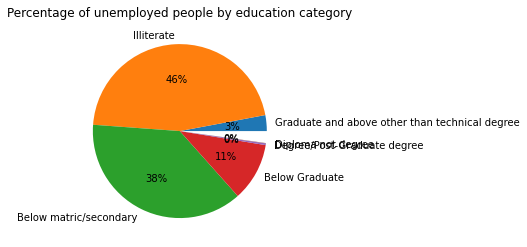

In [23]:
ax = up_educ_df.plot(y="Percentage", kind="pie", labels = up_educ_df["Education category"], autopct = '%1.0f%%', legend=False, title='Percentage of unemployed people by education category')

ax.set(ylabel='')

Drawing a conclusion about education levels of unemployed Uttar Pradesh residents, it is apparent that the iiliterate people contribute the most to joblessness in the state. It means that people with no education get very limited work opportunities. However, the striking fact is that people with some academic competency or another face this issue too deducing that despite being educated people remained devoid of opportunities. But what exact factors make a contribution to the same can't be concluded with given data.

It'd be interesting to know how the non workers count vary for different education categories as per their gender 

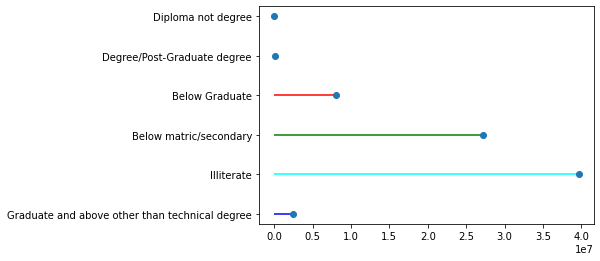

In [24]:
x = up_educ_df["Education category"]
y = up_educ_df["Count for Females"]

line_colors = ['blue', 'cyan', 'green', 'red',
               'skyblue', 'brown', 'yellow']

plt.hlines(y=x, xmin = 0 , xmax = y, color= line_colors)
plt.plot(y, x, "o")
plt.show()

Unemployment among women follow the overall trend noted above i.e. the highest number of jobless women are illiterate followed by literate women yet having academic qualification below matric/secondary.

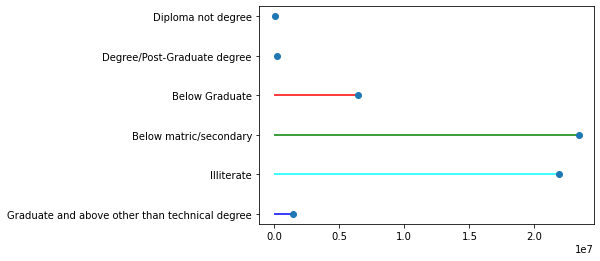

In [25]:
x = up_educ_df["Education category"]
y = up_educ_df["Count for Males"]

line_colors = ['blue', 'cyan', 'green', 'red',
               'skyblue', 'brown', 'yellow']
               

plt.hlines(y=x, xmin = 0 , xmax = y, color = line_colors)
plt.plot(y, x, "o")
plt.show()

Surprisingly, literate men having qualification below matric or secondary are the most jobless among other education categories. Whereas, the difference between count of illiterate jobless and below matric/secondary jobless is not that much.

In [27]:
up_educ_df.to_csv("up.csv",header= True, index= False)